In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\sartyaki\AppData\Local\Programs\Python\Python39\kerala.csv")
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df=df.set_index('Date')


In [7]:
df.head()

,Confirmed
Date,
2020-01-31,0
2020-02-01,0
2020-02-02,1
2020-02-03,1
2020-02-04,0


In [8]:
df.shape

(557, 1)

In [9]:
df.isnull().sum()

Confirmed    0
dtype: int64

In [10]:
import statsmodels
from statsmodels.tsa import seasonal
#decomposition=statsmodels.tsa.seasonal_decompose(df)

In [11]:
decomposition=statsmodels.tsa.seasonal.seasonal_decompose(df)

In [12]:
trend=decomposition.trend
seasonal=decomposition.seasonal
resd=decomposition.resid

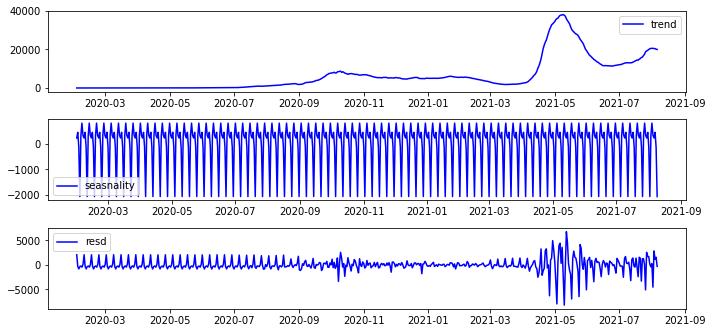

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.plot(trend,label='trend',color='Blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(seasonal,label='seasnality',color='Blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(resd,label='resd',color='Blue')
plt.legend(loc='best')
plt.tight_layout()

In [14]:
rolling_mean=df.rolling(window=2).mean()


In [15]:
decomposition=statsmodels.tsa.seasonal.seasonal_decompose(rolling_mean.dropna())

In [16]:
trend=decomposition.trend
seasonal=decomposition.seasonal
resd=decomposition.resid

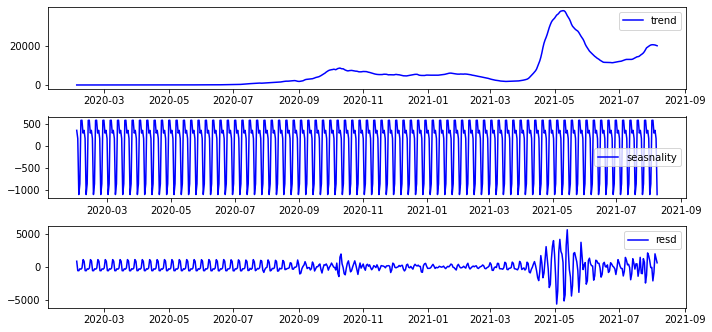

In [17]:
plt.figure(figsize=(10,6))
plt.subplot(411)
plt.plot(trend,label='trend',color='Blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(seasonal,label='seasnality',color='Blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(resd,label='resd',color='Blue')
plt.legend(loc='best')
plt.tight_layout()

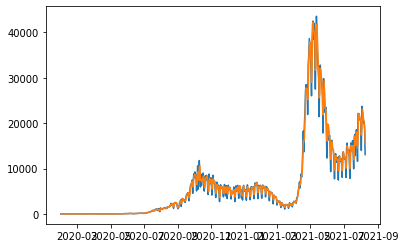

In [18]:
plt.plot(df)
plt.plot(rolling_mean.dropna())

In [19]:
resd=df-rolling_mean.dropna()

In [20]:
resd.mean()

Confirmed    11.734712
dtype: float64

<AxesSubplot:xlabel='Date'>

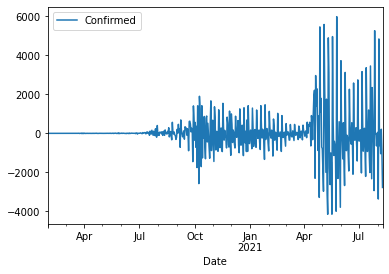

In [21]:
resd.plot()

In [22]:
df.tail(7)

,Confirmed
Date,
2021-08-03,23676
2021-08-04,22414
2021-08-05,22040
2021-08-06,19948
2021-08-07,20367
2021-08-08,18607
2021-08-09,13049


In [23]:
rolling_mean.tail(7)

,Confirmed
Date,
2021-08-03,18830.0
2021-08-04,23045.0
2021-08-05,22227.0
2021-08-06,20994.0
2021-08-07,20157.5
2021-08-08,19487.0
2021-08-09,15828.0


<AxesSubplot:xlabel='Date'>

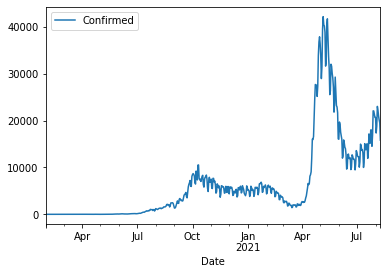

In [24]:
rolling_mean.plot()

In [25]:
from statsmodels.tsa.stattools import adfuller
def perform_adf_test(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [26]:
perform_adf_test(resd.dropna())

ADF Statistic: -4.816274
p-value: 0.000051


In [27]:
print('Root Mean Squared Error:', np.sqrt(np.mean(resd**2)))

Root Mean Squared Error: Confirmed    1086.831528
dtype: float64


In [28]:
rolling_mean=rolling_mean.squeeze()

In [29]:
model=ARIMA(df,order=(0,0,2))
model_fit=model.fit()

C:\Users\sartyaki\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


###ARIMA

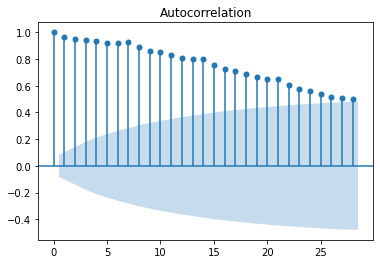

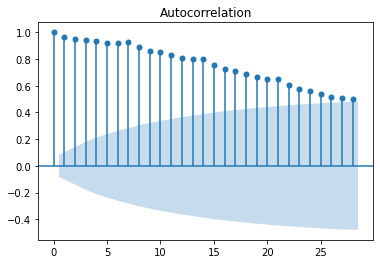

In [30]:
plot_acf(df)

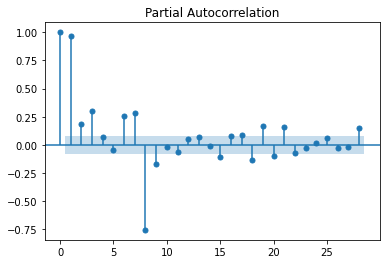

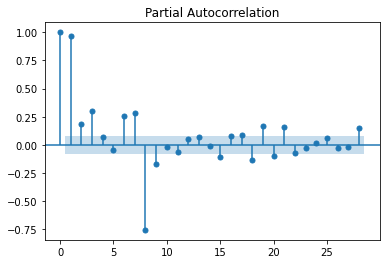

In [31]:
plot_pacf(df)

In [32]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [33]:
arma_order_select_ic(df)

{'bic':               0             1             2
 0  11695.848434  11060.247497  10702.156887
 1  10153.393938  10107.216914  10089.911414
 2  10137.091572  10100.594769  10063.163397
 3  10086.962654  10087.937337   9955.215585
 4  10089.588601  10094.446641   9947.433320,
 'bic_min_order': (4, 2)}

In [34]:
model=ARIMA(df,order=(5,0,2))
model_fit=model.fit()

C:\Users\sartyaki\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\sartyaki\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\sartyaki\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\sartyaki\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\sartyaki\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\sartyaki\a

In [35]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:              Confirmed   No. Observations:                  557
Model:                     ARMA(5, 2)   Log Likelihood               -4957.873
Method:                       css-mle   S.D. of innovations                nan
Date:                Mon, 30 Aug 2021   AIC                           9933.747
Time:                        13:30:26   BIC                           9972.650
Sample:                    01-31-2020   HQIC                          9948.941
                         - 08-09-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6401.3699      0.065   9.78e+04      0.000    6401.242    6401.498
ar.L1.Confirmed     0.3713   4.17e-05   8897.038      0.000       0.371       0.371
ar.L2.Confirmed    -0.3366   3.2

In [36]:
prediction=pd.Series(model_fit.fittedvalues,copy=True)
prediction

Date
2020-01-31     6401.369876
2020-02-01        1.092070
2020-02-02        0.846910
2020-02-03        0.551482
2020-02-04        0.065893
                  ...     
2021-08-05    19317.113483
2021-08-06    22277.765342
2021-08-07    24402.778984
2021-08-08    18227.138917
2021-08-09    16026.386020
Length: 557, dtype: float64

In [37]:
df.tail(7)

,Confirmed
Date,
2021-08-03,23676
2021-08-04,22414
2021-08-05,22040
2021-08-06,19948
2021-08-07,20367
2021-08-08,18607
2021-08-09,13049


In [38]:
rolling_mean=df.rolling(window=3).mean()

In [39]:
df_moving_average=df-rolling_mean

In [40]:
df_moving_average.dropna(inplace=True)

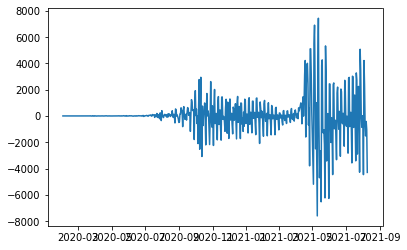

In [41]:
plt.plot(df_moving_average)

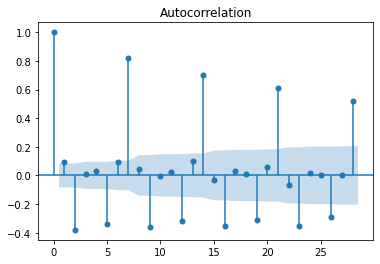

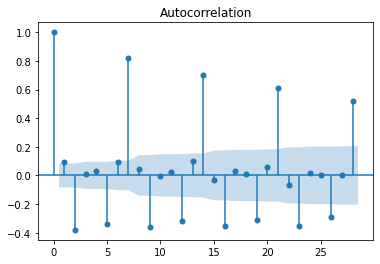

In [42]:
plot_acf(df_moving_average)

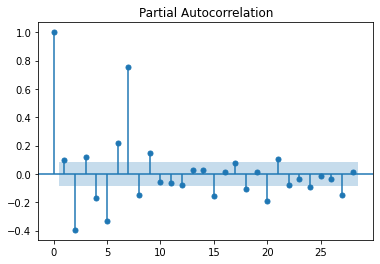

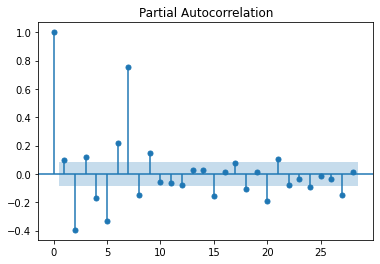

In [43]:
plot_pacf(df_moving_average)

In [44]:
from statsmodels.tsa.stattools import adfuller

In [45]:

def perform_adf_test(df_moving_average):
    result = adfuller(df_moving_average)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [46]:
perform_adf_test(df_moving_average)

ADF Statistic: -5.111627
p-value: 0.000013


In [47]:
arma_order_select_ic(df_moving_average)

C:\Users\sartyaki\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'bic':              0            1            2
 0  9687.215387  9669.489504  9580.119149
 1  9688.223604  9602.384819  9578.946003
 2  9599.793127  9596.223555  9453.269380
 3  9598.276625  9602.115465  9461.542983
 4  9588.287047  9582.292405  9399.113499,
 'bic_min_order': (4, 2)}

In [48]:
model=ARIMA(df_moving_average,order=(9,0,0))
model_fit=model.fit()

C:\Users\sartyaki\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [49]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:              Confirmed   No. Observations:                  555
Model:                     ARMA(9, 0)   Log Likelihood               -4475.580
Method:                       css-mle   S.D. of innovations            763.372
Date:                Mon, 30 Aug 2021   AIC                           8973.161
Time:                        13:30:42   BIC                           9020.670
Sample:                    02-02-2020   HQIC                          8991.719
                         - 08-09-2021                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              25.0748    100.191      0.250      0.802    -171.296     221.445
ar.L1.Confirmed     0.1564      0.042      3.735      0.000       0.074       0.239
ar.L2.Confirmed    -0.2511      

In [50]:
prediction=pd.Series(model_fit.fittedvalues,copy=True)
prediction

Date
2020-02-02      25.074813
2020-02-03      23.159830
2020-02-04      32.162677
2020-02-05      28.879714
2020-02-06      34.094523
                 ...     
2021-08-05    -270.456732
2021-08-06    -970.109061
2021-08-07    -148.711893
2021-08-08     -62.524077
2021-08-09   -3648.611139
Length: 555, dtype: float64

In [51]:
df.tail(7)

,Confirmed
Date,
2021-08-03,23676
2021-08-04,22414
2021-08-05,22040
2021-08-06,19948
2021-08-07,20367
2021-08-08,18607
2021-08-09,13049


In [52]:
prediction_df=prediction.to_frame()

In [53]:
prediction_df.tail()

,0
Date,
2021-08-05,-270.456732
2021-08-06,-970.109061
2021-08-07,-148.711893
2021-08-08,-62.524077
2021-08-09,-3648.611139


In [54]:
rolling_mean.dropna(inplace=True)

In [55]:
value=prediction[0]+rolling_mean['Confirmed']

In [56]:
value.tail(7)

Date
2021-08-03    19487.741479
2021-08-04    20049.741479
2021-08-05    22735.074813
2021-08-06    21492.408146
2021-08-07    20810.074813
2021-08-08    19665.741479
2021-08-09    17366.074813
Name: Confirmed, dtype: float64

In [57]:
df.tail(7)

,Confirmed
Date,
2021-08-03,23676
2021-08-04,22414
2021-08-05,22040
2021-08-06,19948
2021-08-07,20367
2021-08-08,18607
2021-08-09,13049


In [58]:
value_df=value.to_frame()

In [59]:
value_df.head()

,Confirmed
Date,
2020-02-02,25.408146
2020-02-03,25.741479
2020-02-04,25.741479
2020-02-05,25.408146
2020-02-06,25.074813


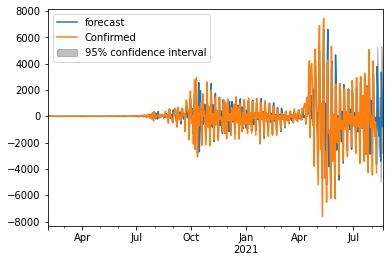

<Figure size 1080x1440 with 0 Axes>

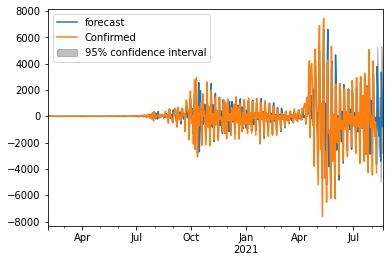

In [60]:
plt.figure(figsize=(15,20))
model_fit.plot_predict(1,564)

In [61]:
forecast_new=model_fit.forecast(steps=7)
forecast=forecast_new[0]

In [62]:
forecast

array([ 3785.17673234,  2265.56063925,  -723.03916572, -1484.43619715,
         -94.88298541,  -963.79688448, -3411.43623474])

In [63]:
new_df = df.tail(3)
new_df

# converting forecast value to orginal scale
for fc in forecast:
    s = new_df.iloc[-2:].sum()
    value = ((3*fc)+s)/2
    new_df = new_df.append(value, ignore_index=True)
    
# printing first five rows of new dataframe
new_df

,Confirmed
0,20367.000000
1,18607.000000
2,13049.000000
3,21505.765099
4,20675.723508
5,20006.185555
6,18114.300236
7,18917.918417
8,17070.414000
9,12877.011856


In [64]:
new_df.shape

(10, 1)

In [65]:
date=pd.date_range('2021-08-10','2021-08-16')

In [66]:
forcast_df = pd.DataFrame({'Date':date,
                           'Confirmed':new_df['Confirmed'][3:]}) 

# set datatype to datetime format
forcast_df['Date']=pd.to_datetime(forcast_df['Date'], infer_datetime_format=True)

# set Date column as index
forcast_df = forcast_df.set_index('Date')

In [67]:
forcast_df.head(7)

,Confirmed
Date,
2021-08-10,21505.765099
2021-08-11,20675.723508
2021-08-12,20006.185555
2021-08-13,18114.300236
2021-08-14,18917.918417
2021-08-15,17070.414000
2021-08-16,12877.011856


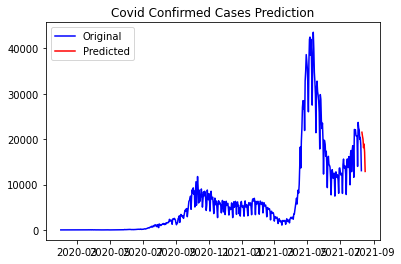

In [68]:
orgi = plt.plot(df, color='b', label='Original')
predi = plt.plot(forcast_df, color='r', label='Predicted')
plt.legend(loc='best')
plt.title('Covid Confirmed Cases Prediction')
plt.show(block=False)

In [69]:
actual=pd.DataFrame({'Date':date,
    'Confirmed':[21119,19411,21445,20452,19451,18582,12294
                                 ]})

In [70]:
actual.head(7)

,Date,Confirmed
0,2021-08-10,21119
1,2021-08-11,19411
2,2021-08-12,21445
3,2021-08-13,20452
4,2021-08-14,19451
5,2021-08-15,18582
6,2021-08-16,12294


In [71]:
actual.set_index('Date',inplace=True)

In [72]:
resd=actual-forcast_df

In [73]:
resd

,Confirmed
Date,
2021-08-10,-386.765099
2021-08-11,-1264.723508
2021-08-12,1438.814445
2021-08-13,2337.699764
2021-08-14,533.081583
2021-08-15,1511.586000
2021-08-16,-583.011856


In [74]:
percentage_change=(forcast_df-actual)*100/actual

In [75]:
percentage_change.tail(7)

,Confirmed
Date,
2021-08-10,1.831361
2021-08-11,6.515499
2021-08-12,-6.709324
2021-08-13,-11.430177
2021-08-14,-2.740638
2021-08-15,-8.134679
2021-08-16,4.742247
